EXPLORATORY DATA ANALYSIS of STUDENT PERFORMANCE 

In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### 1) Problem statement
- This project understands how the student's performance (test scores) is affected by other variables such as Gender, Ethnicity, Parental level of education, Lunch and Test preparation course.


### 2) Data Collection
- Dataset Source - https://www.kaggle.com/datasets/spscientist/students-performance-in-exams?datasetId=74977
- The data consists of 8 column and 1000 rows.


### 2.1 Import Data and Required Packages
####  Importing Pandas, Numpy, Matplotlib, Seaborn and Warings Library.

In [4]:
df=pd.read_csv('data/StudentsPerformance.csv')
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


### 2.2 Dataset information

- gender : sex of students  -> (Male/female)
- race/ethnicity : ethnicity of students -> (Group A, B,C, D,E)
- parental level of education : parents' final education ->(bachelor's degree,some college,master's degree,associate's degree,high school)
- lunch : having lunch before test (standard or free/reduced) 
- test preparation course : complete or not complete before test
- math score
- reading score
- writing score

In [5]:
df.columns

Index(['gender', 'race/ethnicity', 'parental level of education', 'lunch',
       'test preparation course', 'math score', 'reading score',
       'writing score'],
      dtype='object')

### 3. Data Checks to perform

- Check Missing values
- Check Duplicates
- Check data type
- Check the number of unique values of each column
- Check statistics of data set
- Check various categories present in the different categorical column

In [6]:
#checking missing values
df.isnull().sum()

gender                         0
race/ethnicity                 0
parental level of education    0
lunch                          0
test preparation course        0
math score                     0
reading score                  0
writing score                  0
dtype: int64

In [7]:
#check duplicates 
df.duplicated().sum()

np.int64(0)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [9]:
df.nunique()

gender                          2
race/ethnicity                  5
parental level of education     6
lunch                           2
test preparation course         2
math score                     81
reading score                  72
writing score                  77
dtype: int64

In [10]:
df.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


## Result analysis 

*there are 0 null values  
*there are 0 duplicate values  
*numerical features - math score, reading score and writing score  
*categorical features - gender,race/ethnicity,parental level of education,lunch,test  *preparation course  
*total records - 1000 

### 3.7 Exploring Data

In [11]:
print("Categories in 'gender' variable:     ",end=" " )
print(df['gender'].unique())

print("Categories in 'race/ethnicity' variable:  ",end=" ")
print(df['race/ethnicity'].unique())

print("Categories in'parental level of education' variable:",end=" " )
print(df['parental level of education'].unique())

print("Categories in 'lunch' variable:     ",end=" " )
print(df['lunch'].unique())

print("Categories in 'test preparation course' variable:     ",end=" " )
print(df['test preparation course'].unique())

Categories in 'gender' variable:      ['female' 'male']
Categories in 'race/ethnicity' variable:   ['group B' 'group C' 'group A' 'group D' 'group E']
Categories in'parental level of education' variable: ["bachelor's degree" 'some college' "master's degree" "associate's degree"
 'high school' 'some high school']
Categories in 'lunch' variable:      ['standard' 'free/reduced']
Categories in 'test preparation course' variable:      ['none' 'completed']


In [12]:
# define numerical & categorical columns
numeric_features = [feature for feature in df.columns if df[feature].dtype != 'O']
categorical_features = [feature for feature in df.columns if df[feature].dtype == 'O']

# print columns
print('We have {} numerical features : {}'.format(len(numeric_features), numeric_features))
print('\nWe have {} categorical features : {}'.format(len(categorical_features), categorical_features))

We have 3 numerical features : ['math score', 'reading score', 'writing score']

We have 5 categorical features : ['gender', 'race/ethnicity', 'parental level of education', 'lunch', 'test preparation course']


### 3.8 Adding columns for "Total Score" and "Average"

In [13]:
df["average score"]=(df["math score"]+df["reading score"]+df["writing score"])/3
df.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,average score
0,female,group B,bachelor's degree,standard,none,72,72,74,72.666667
1,female,group C,some college,standard,completed,69,90,88,82.333333
2,female,group B,master's degree,standard,none,90,95,93,92.666667
3,male,group A,associate's degree,free/reduced,none,47,57,44,49.333333
4,male,group C,some college,standard,none,76,78,75,76.333333


Subject wise comparision 

In [14]:
reading_above_75 = df[df['reading score'] >= 75]["reading score"].count()
writing_above_75 = df[df['writing score'] >= 75]["writing score"].count()
math_above_75 = df[df['math score'] >= 75]["math score"].count()

print(f'Number of students with full marks in Maths: {math_above_75}')
print(f'Number of students with full marks in Writing: {writing_above_75}')
print(f'Number of students with full marks in Reading: {reading_above_75}')

Number of students with full marks in Maths: 295
Number of students with full marks in Writing: 350
Number of students with full marks in Reading: 370


In [15]:
reading_below_30 = df[df['reading score'] <= 30]["reading score"].count()
writing_below_30 = df[df['writing score'] <= 30]["writing score"].count()
math_below_30 = df[df['math score'] <= 30]["math score"].count()

print(f'Number of students with less than 20 marks in Maths: {math_below_30}')
print(f'Number of students with less than 20 marks in Writing: {writing_below_30}')
print(f'Number of students with less than 20 marks in Reading: {reading_below_30}')

Number of students with less than 20 marks in Maths: 16
Number of students with less than 20 marks in Writing: 10
Number of students with less than 20 marks in Reading: 8


The above analysis shows that maths was the toughest subject faced by the students compared to writing and reading 

### 4. Exploring Data ( Visualization )
#### 4.1 Visualize average score distribution to make some conclusion. 
- Histogram
- Kernel Distribution Function (KDE)

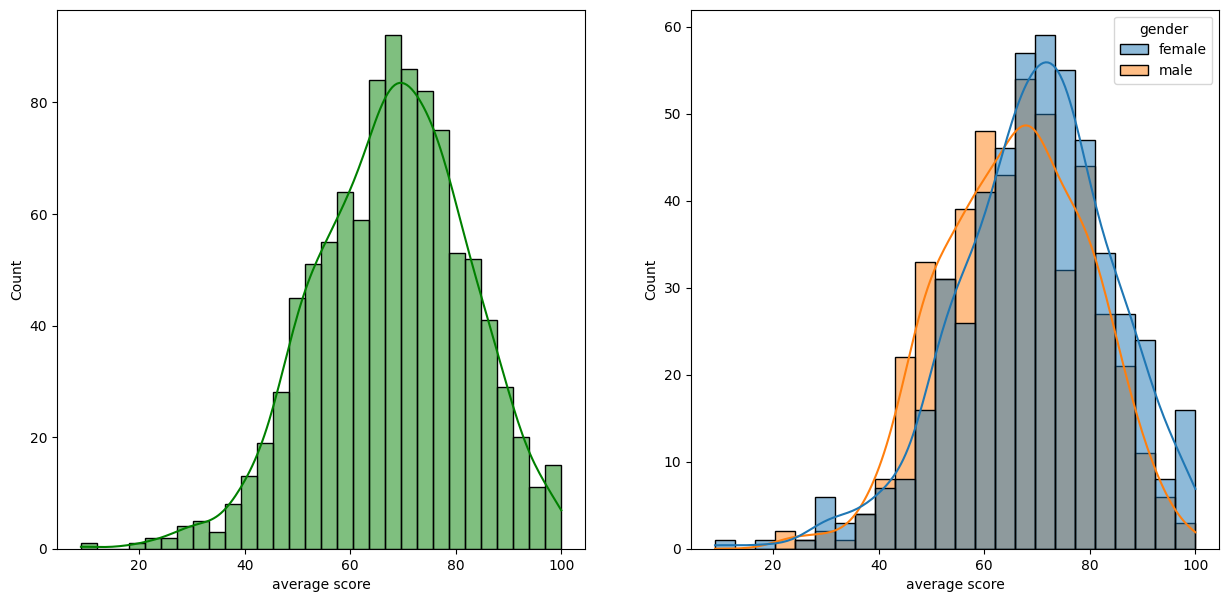

In [16]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

Female students tend to perform better than male students

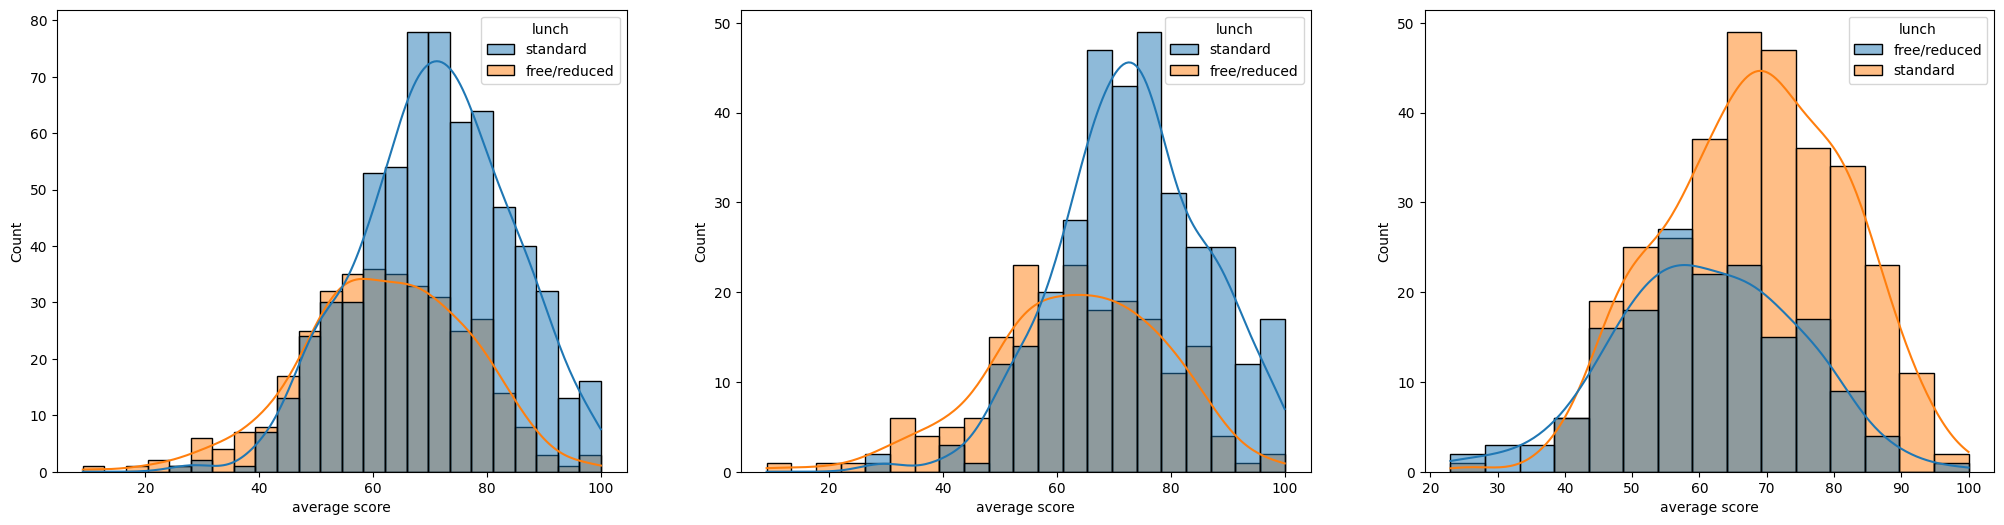

In [17]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
sns.histplot(data=df,x='average score',kde=True,hue='lunch')
plt.subplot(132)
sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='lunch')
plt.subplot(133)
sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='lunch')
plt.show()

Standard Lunch helps students to perform better than free lunch irrespective of gender 

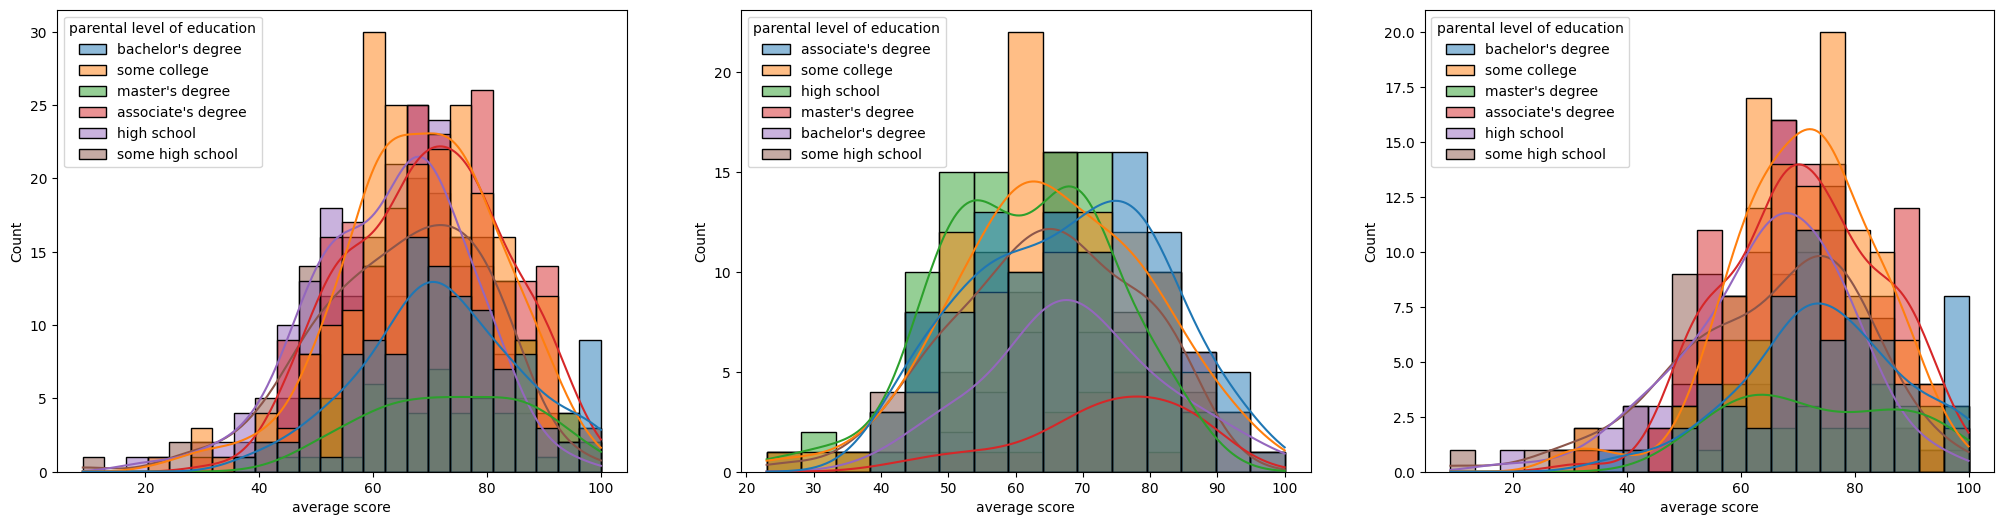

In [18]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='parental level of education')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='parental level of education')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='parental level of education')
plt.show()

Parents level of education doesn't affect the student scores generally except for master's

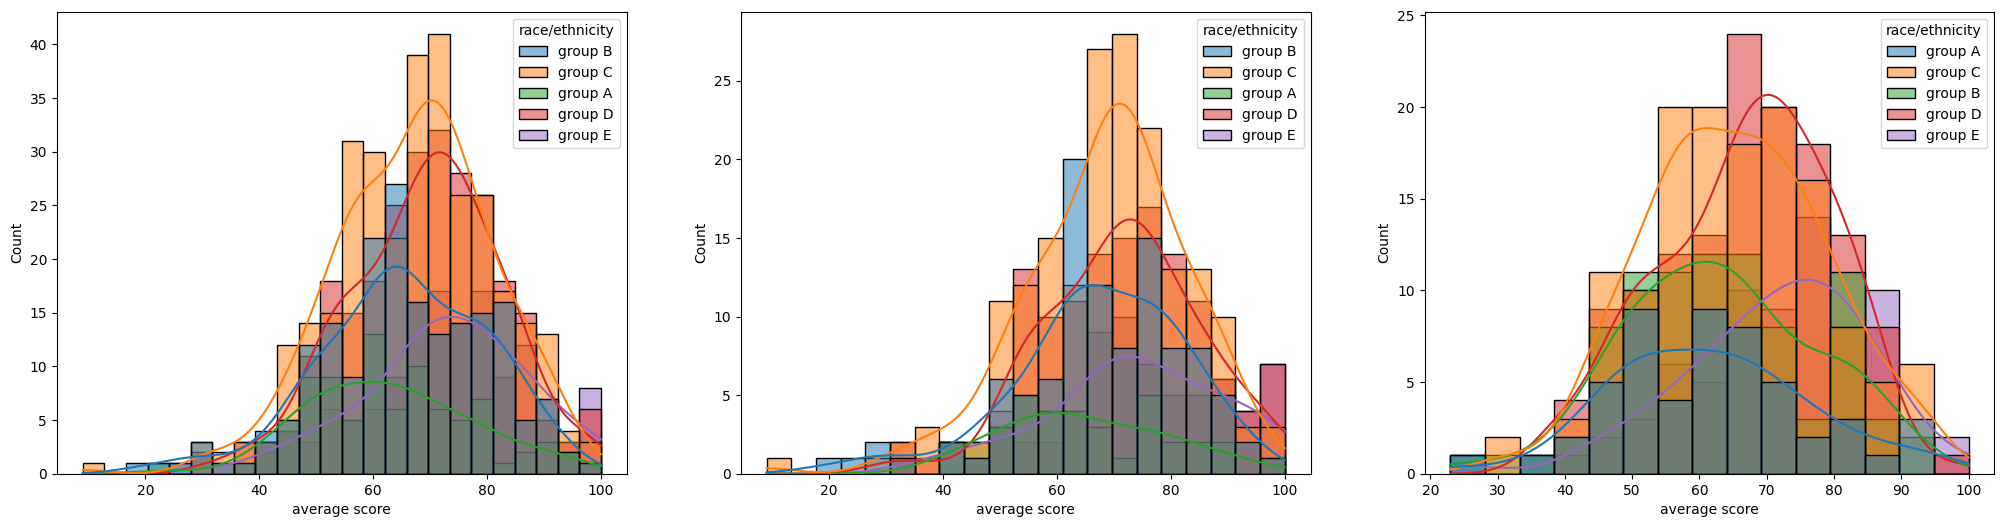

In [19]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='race/ethnicity')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='race/ethnicity')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='race/ethnicity')
plt.show()

Group A and Group B tend to perform poor  
Group E tends to perform better than other groups 

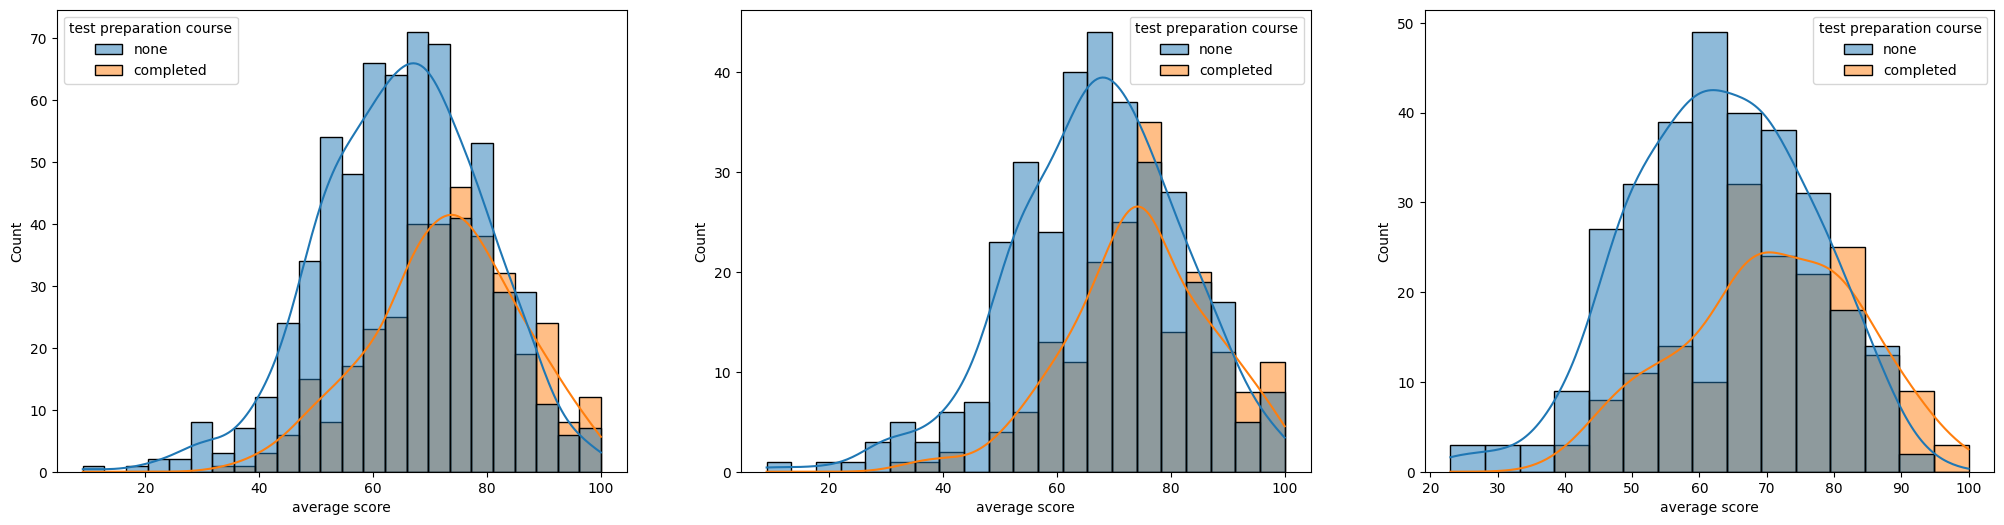

In [26]:
plt.subplots(1,3,figsize=(25,6))
plt.subplot(131)
ax =sns.histplot(data=df,x='average score',kde=True,hue='test preparation course')
plt.subplot(132)
ax =sns.histplot(data=df[df.gender=='female'],x='average score',kde=True,hue='test preparation course')
plt.subplot(133)
ax =sns.histplot(data=df[df.gender=='male'],x='average score',kde=True,hue='test preparation course')
plt.show()

Students who have completed course tend to perform slightly better than who have not 

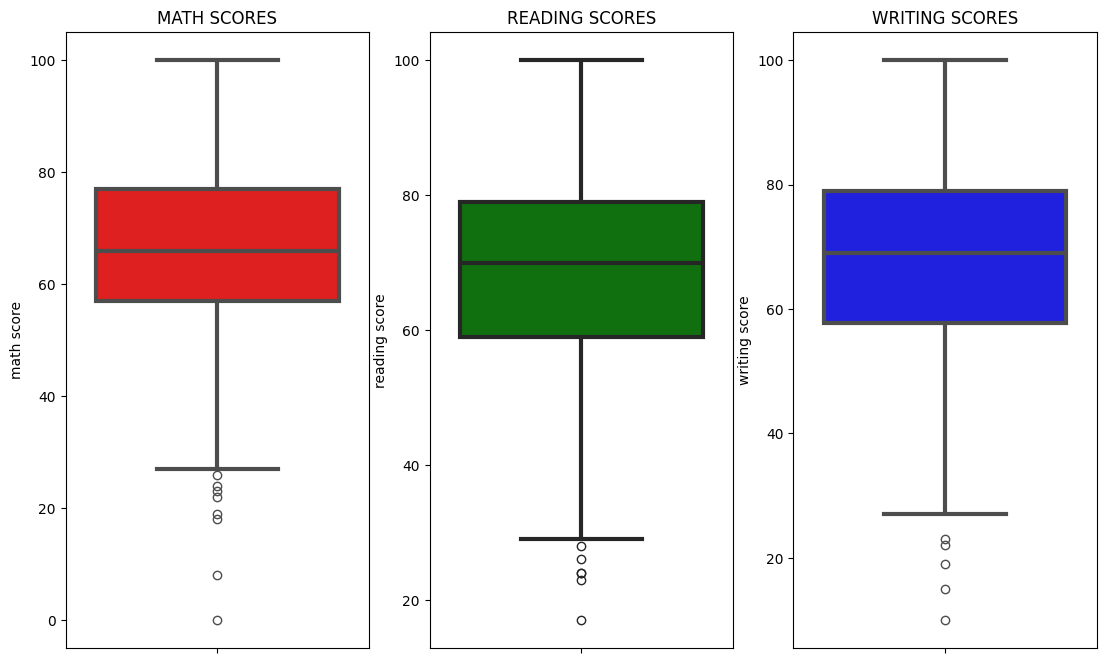

In [21]:

plt.figure(figsize=(18,8))
plt.subplot(1, 4, 1)
plt.title('MATH SCORES')
sns.boxplot(y='math score',data=df,color='red',linewidth=3)
plt.subplot(1, 4, 2)
plt.title('READING SCORES')
sns.boxplot(y='reading score',data=df,color='green',linewidth=3)
plt.subplot(1, 4, 3)
plt.title('WRITING SCORES')
sns.boxplot(y='writing score',data=df,color='blue',linewidth=3)
plt.show()

From the above three plots its clearly visible that most of the students score in between 60-80 in Maths whereas in reading and writing most of them score from 50-80

#### 4.3 Multivariate analysis using pieplot

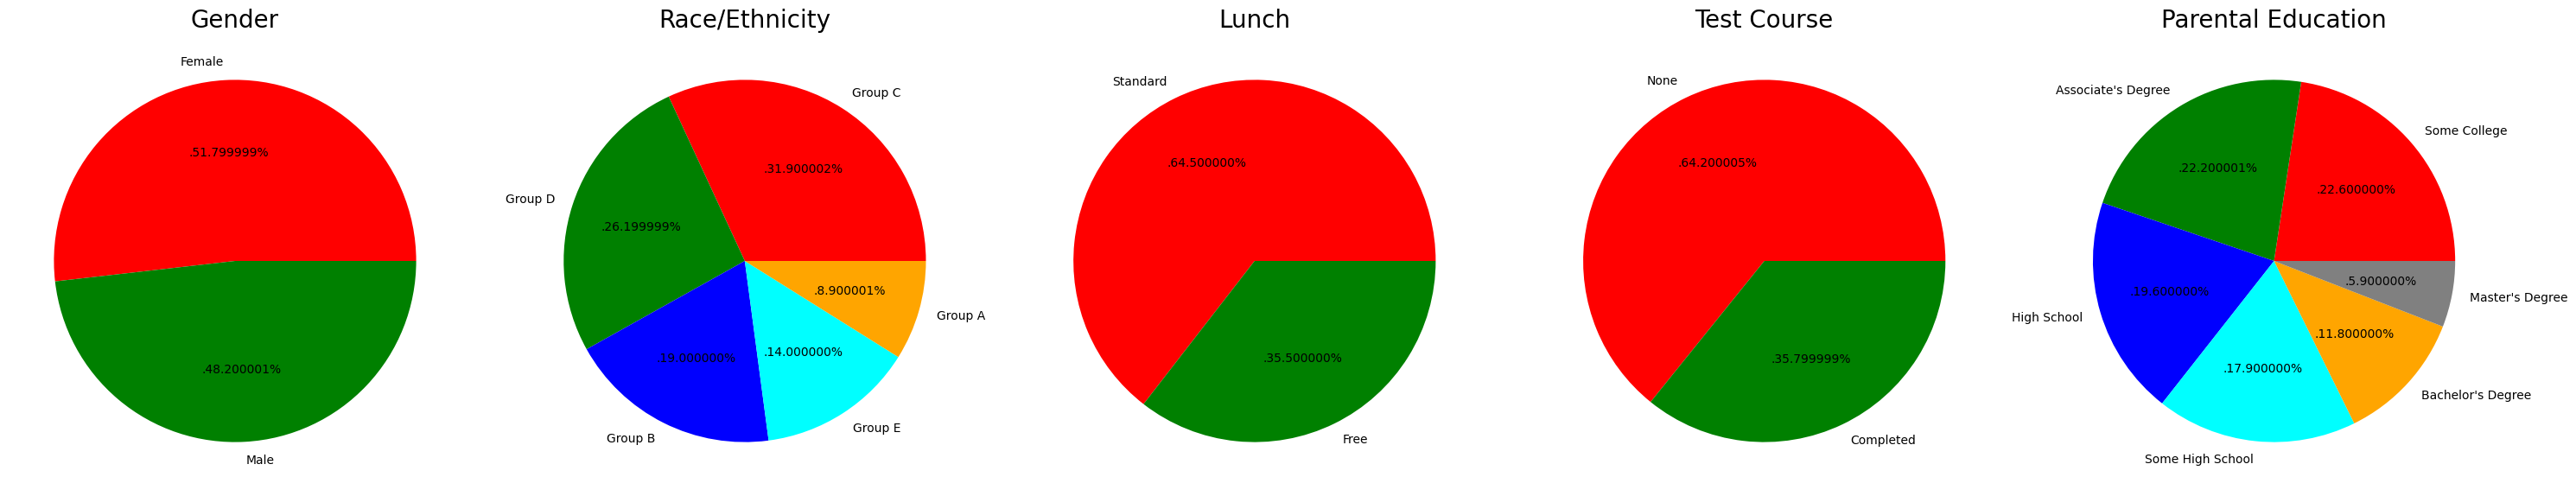

In [22]:
plt.rcParams['figure.figsize'] = (30, 12)

plt.subplot(1, 5, 1)
size = df['gender'].value_counts()
labels = 'Female', 'Male'
color = ['red','green']


plt.pie(size, colors = color, labels = labels,autopct = '.%2f%%')
plt.title('Gender', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 2)
size = df['race/ethnicity'].value_counts()
labels = 'Group C', 'Group D','Group B','Group E','Group A'
color = ['red', 'green', 'blue', 'cyan','orange']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Race/Ethnicity', fontsize = 20)
plt.axis('off')



plt.subplot(1, 5, 3)
size = df['lunch'].value_counts()
labels = 'Standard', 'Free'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Lunch', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 4)
size = df['test preparation course'].value_counts()
labels = 'None', 'Completed'
color = ['red','green']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Test Course', fontsize = 20)
plt.axis('off')


plt.subplot(1, 5, 5)
size = df['parental level of education'].value_counts()
labels = 'Some College', "Associate's Degree",'High School','Some High School',"Bachelor's Degree","Master's Degree"
color = ['red', 'green', 'blue', 'cyan','orange','grey']

plt.pie(size, colors = color,labels = labels,autopct = '.%2f%%')
plt.title('Parental Education', fontsize = 20)
plt.axis('off')


plt.tight_layout()
plt.grid()

plt.show()

#####  Insights
- Number of Male and Female students is almost equal
- Number students are greatest in Group C
- Number of students who have standard lunch are greater
- Number of students who have not enrolled in any test preparation course is greater
- Number of students whose parental education is "Some College" is greater followed closely by "Associate's Degree"

### 5. Conclusions
- Student's Performance is related with lunch, race, parental level education
- Females lead in pass percentage and also are top-scorers
- Student's Performance is not much related with test preparation course
- Finishing preparation course is benefitial.

In [27]:
pd.crosstab(df["race/ethnicity"],df["lunch"])

lunch,free/reduced,standard
race/ethnicity,,
group A,36,53
group B,69,121
group C,114,205
group D,95,167
group E,41,99


Categorical to Categorical analysis

In [28]:
from scipy.stats import chi2_contingency
chi2_contingency(pd.crosstab(df['race/ethnicity'], df['lunch']))

Chi2ContingencyResult(statistic=np.float64(3.4423502326273185), pvalue=np.float64(0.48669808284196503), dof=4, expected_freq=array([[ 31.595,  57.405],
       [ 67.45 , 122.55 ],
       [113.245, 205.755],
       [ 93.01 , 168.99 ],
       [ 49.7  ,  90.3  ]]))

Numerical to Categorical / Categorical to Numerical analysis

In [29]:
df.groupby('gender')['average score'].describe()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,518.0,69.569498,14.541809,9.0,60.666667,70.333333,78.666667,100.0
male,482.0,65.837483,13.698840,23.0,56.000000,66.333333,76.250000,100.0


Numerical to Numerical analysis

In [30]:
df[['reading score', 'writing score']].corr(method='pearson')

,reading score,writing score
reading score,1.000000,0.954598
writing score,0.954598,1.000000


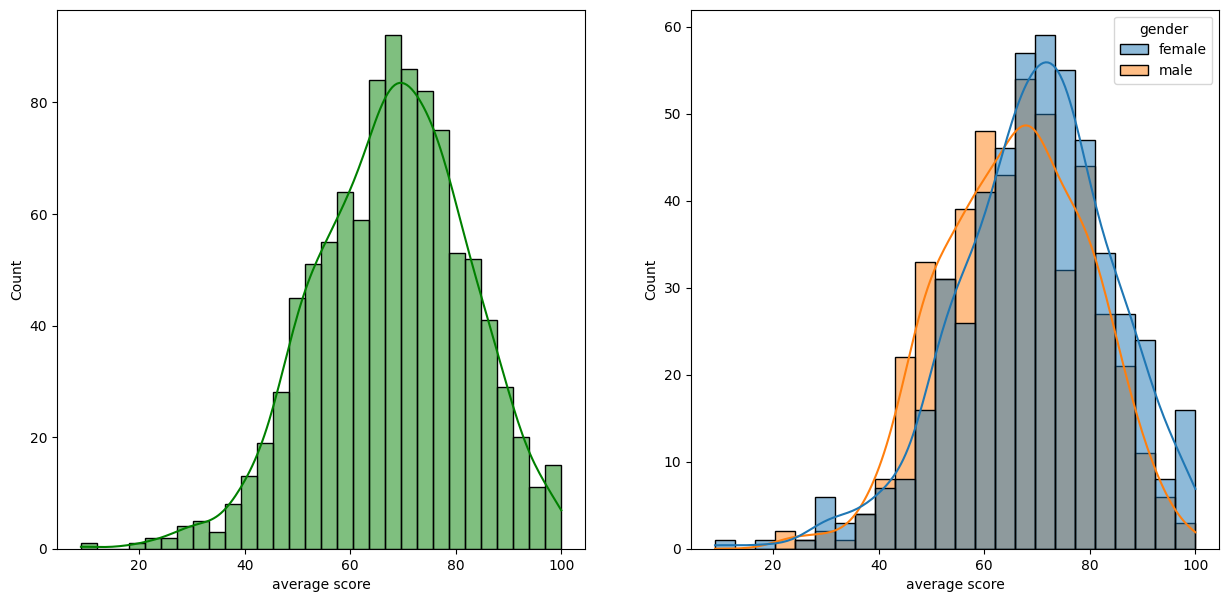

In [32]:
fig, axs = plt.subplots(1, 2, figsize=(15, 7))
plt.subplot(121)
sns.histplot(data=df,x='average score',bins=30,kde=True,color='g')
plt.subplot(122)
sns.histplot(data=df,x='average score',kde=True,hue='gender')
plt.show()

<Axes: xlabel='reading score', ylabel='writing score'>

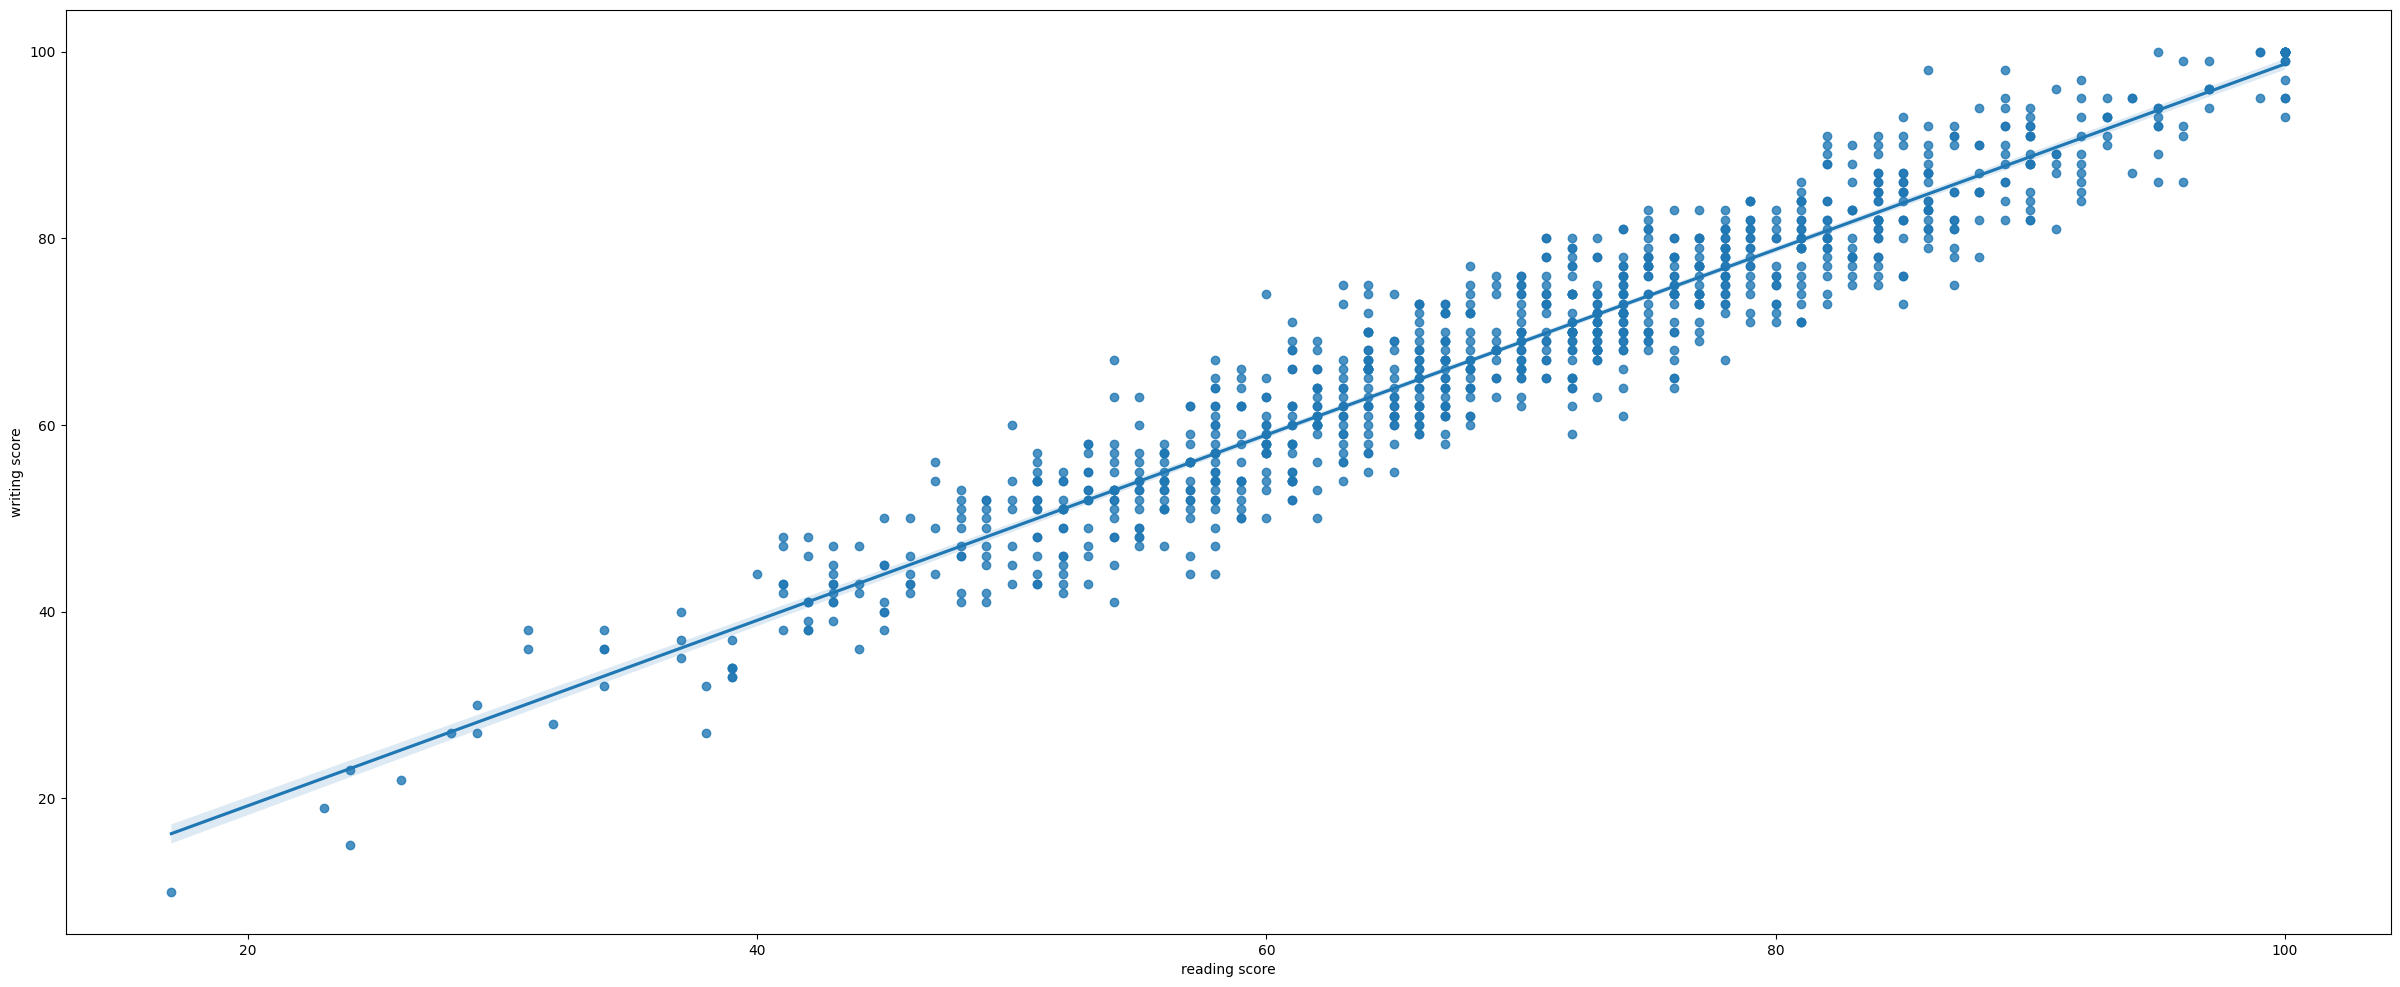

In [31]:
sns.regplot(x='reading score',y='writing score',data=df)